In [3]:
import linkpred
from linkpred.evaluation import Pair
import networkx as nx
import random
import itertools
from operator import itemgetter
import pickle
import matplotlib.pyplot as plt

In [4]:
path = "../DataSet StackOverflow/"

In [5]:
path_graph = "../DataSet StackOverflow/Graph_data/"

In [12]:
saved_path = "../DataSet StackOverflow/LinkPrediction_task/597/"

In [7]:
G = nx.read_graphml(path_graph+"Real_Network.graphml")

In [8]:
nx.info(G)

'Name: \nType: Graph\nNumber of nodes: 13780\nNumber of edges: 97892\nAverage degree:  14.2078'

# 1) Set preparation

In [128]:
degree_dict = dict(G.degree(G.nodes()))
nx.set_node_attributes(G, degree_dict, 'degree')
sorted_degree = sorted(degree_dict.items(), key = itemgetter(1), reverse = True)

In [174]:
sample_nodes = []
for i in sorted_degree:
    if i[1] > 50:
        sample_nodes.append(i[0])
print(len(sample_nodes))

597


In [175]:
new_graph = G.subgraph(sample_nodes)

print(len(new_graph.nodes()))
print(len(new_graph.edges()))

training_edge_len = len(new_graph.edges()) - int(len(new_graph.edges())/100 * 20)
test_edge_len = len(new_graph.edges()) - training_edge_len

597
18056


In [179]:
print(training_edge_len)
print(test_edge_len)

14445
3611


In [185]:
training_edges = random.sample(new_graph.edges, training_edge_len)

In [186]:
training_edges

[('undefined-behavior', 'multidimensional-array'),
 ('asp.net-core', 'jwt'),
 ('c#', 'dependencies'),
 ('swift', 'oauth-2.0'),
 ('.net-core-3.1', 'azure-pipelines'),
 ('asp.net-core-3.1', 'jwt'),
 ('postgresql', 'gradle'),
 ('amazon-cognito', 'amazon-cloudformation'),
 ('tensorflow', 'pip'),
 ('redux', 'typescript'),
 ('c++11', 'performance'),
 ('dockerfile', 'containers'),
 ('webpack', 'google-chrome-extension'),
 ('proxy', 'php'),
 ('performance', 'statistics'),
 ('google-colaboratory', 'jupyter'),
 ('jackson', 'generics'),
 ('flask', 'server'),
 ('xcode', 'debugging'),
 ('dictionary', 'group-by'),
 ('node.js', 'multithreading'),
 ('static', 'types'),
 ('javascript', 'blazor'),
 ('exception', 'csv'),
 ('scala', 'user-interface'),
 ('deployment', 'maven'),
 ('tcp', 'go'),
 ('heroku', 'express'),
 ('artificial-intelligence', 'pygame'),
 ('python', 'intellij-idea'),
 ('docker', 'blazor-webassembly'),
 ('webpack', 'nuxt.js'),
 ('css', 'sorting'),
 ('tensorflow', 'python-3.8'),
 ('xml', '

2) Create training and test set

In [190]:
training = new_graph.edge_subgraph(training_edges)

In [191]:
print(nx.info(training))

Name: 
Type: Graph
Number of nodes: 597
Number of edges: 14445
Average degree:  48.3920


In [192]:
test = new_graph.copy()
test.remove_edges_from(training.edges())

In [193]:
print(nx.info(test))

Name: 
Type: Graph
Number of nodes: 597
Number of edges: 3611
Average degree:  12.0972


4) Create node set

In [194]:
nodes = list(new_graph.nodes())
nodes.extend(list(test.nodes()))

5) Compute pair test set and universe set

In [200]:
test = [Pair(i) for i in test.edges()]
universe = set([Pair(i) for i in itertools.product(nodes, nodes) if i[0]!=i[1]])

In [203]:
print(len(universe))

177906


6) Storage file

In [207]:
universe

{Pair('webassembly', 'babeljs'),
 Pair('for-loop', 'algorithm'),
 Pair('web', 'casting'),
 Pair('selenium-webdriver', 'pointers'),
 Pair('python-3.8', 'numpy'),
 Pair('terminal', 'g++'),
 Pair('google-kubernetes-engine', 'blazor-webassembly'),
 Pair('tuples', 'security'),
 Pair('inheritance', 'cors'),
 Pair('webpack', 'macos-catalina'),
 Pair('multiprocessing', 'compiler-optimization'),
 Pair('linker', 'android-jetpack'),
 Pair('macos-catalina', 'datetime'),
 Pair('validation', 'download'),
 Pair('identityserver4', 'error-handling'),
 Pair('tomcat', 'jupyter'),
 Pair('python-3.x', 'azure-web-app-service'),
 Pair('formatting', 'firefox'),
 Pair('tcp', 'bash'),
 Pair('ssl-certificate', 'github'),
 Pair('ios13', 'angular'),
 Pair('regex', 'expo'),
 Pair('pytest', 'firebase-authentication'),
 Pair('npm-install', 'animation'),
 Pair('conv-neural-network', 'azure-web-app-service'),
 Pair('google-analytics', 'azure'),
 Pair('ssl', 'openssl'),
 Pair('r-markdown', 'logging'),
 Pair('github-acti

In [208]:
with open(saved_path+'universe_597.pickle', 'wb') as f:
    pickle.dump(universe, f)
with open(saved_path+'test_597.pickle', 'wb') as f:
    pickle.dump(test, f) 
nx.write_graphml(training, saved_path+"training_597.graphml")

# 2) Prediction

1) Read data

In [27]:
with open(saved_path+'universe_597.pickle', 'rb') as f:
    universe = pickle.load(f)
with open(saved_path+'test_597.pickle', 'rb') as f:
    test = pickle.load(f)
training = nx.read_graphml(saved_path+"training_597.graphml")

2) Predictions

In [10]:
cn = linkpred.predictors.CommonNeighbours(training, excluded=training.edges())
cn_results = cn.predict()

In [11]:
aa = linkpred.predictors.AdamicAdar(training, excluded=training.edges())
aa_results = aa.predict()

In [12]:
jc = linkpred.predictors.Jaccard(training, excluded=training.edges())
jc_results = jc.predict()

In [13]:
kz = linkpred.predictors.Katz(training, excluded=training.edges())
kz_results = kz.predict()

Computing matrix powers: [############################################################] 5/5


In [14]:
simrank = linkpred.predictors.SimRank(training, excluded=training.edges())
simrank_results = simrank.predict()

3) Saved predictions

In [15]:
with open(saved_path+'aa_results.pickle', 'wb') as f:
    pickle.dump(aa_results, f)
with open(saved_path+'cn_results.pickle', 'wb') as f:
    pickle.dump(cn_results, f) 
with open(saved_path+'jc_results.pickle', 'wb') as f:
    pickle.dump(jc_results, f) 
with open(saved_path+'kz_results.pickle', 'wb') as f:
    pickle.dump(kz_results, f) 
with open(saved_path+'simrank_results.pickle', 'wb') as f:
    pickle.dump(simrank_results, f) 

3) Evaluation

In [16]:
cn_evaluation = linkpred.evaluation.EvaluationSheet(cn_results, test, universe)

In [17]:
with open(saved_path+'cn_evaluation.pickle', 'wb') as f:
    pickle.dump(cn_evaluation, f) 

In [18]:
aa_evaluation = linkpred.evaluation.EvaluationSheet(aa_results, test, universe)

In [19]:
with open(saved_path+'aa_evaluation.pickle', 'wb') as f:
    pickle.dump(aa_evaluation, f) 

In [20]:
jc_evaluation = linkpred.evaluation.EvaluationSheet(jc_results, test, universe)

In [21]:
with open(saved_path+'jc_evaluation.pickle', 'wb') as f:
    pickle.dump(jc_evaluation, f) 

In [22]:
kz_evaluation = linkpred.evaluation.EvaluationSheet(kz_results, test, universe)

In [23]:
with open(saved_path+'kz_evaluation.pickle', 'wb') as f:
    pickle.dump(kz_evaluation, f) 

In [24]:
simrank_evaluation = linkpred.evaluation.EvaluationSheet(simrank_results, test, universe)

In [25]:
with open(saved_path+'simrank_evaluation.pickle', 'wb') as f:
    pickle.dump(simrank_evaluation, f) 

In [43]:
res = []
for i, j in zip(cn_results, cn_results.values()):
    res.append([Pair(i), j])
with open(saved_path+'cn_results.pickle', 'wb') as f:
    pickle.dump(res, f)

In [44]:
res = []
for i, j in zip(aa_results, aa_results.values()):
    res.append([Pair(i), j])
with open(saved_path+'aa_results.pickle', 'wb') as f:
    pickle.dump(res, f)

In [45]:
res = []
for i, j in zip(jc_results, jc_results.values()):
    res.append([Pair(i), j])
with open(saved_path+'jc_results.pickle', 'wb') as f:
    pickle.dump(res, f)

In [46]:
res = []
for i, j in zip(kz_results, kz_results.values()):
    res.append([Pair(i), j])
with open(saved_path+'kz_results.pickle', 'wb') as f:
    pickle.dump(res, f)

In [47]:
res = []
for i, j in zip(simrank_results, simrank_results.values()):
    res.append([Pair(i), j])
with open(saved_path+'simrank_results.pickle', 'wb') as f:
    pickle.dump(res, f)

# 3) Result Analysis

In [13]:
with open(saved_path+'aa_evaluation.pickle', 'rb') as f:
    aa_evaluation = pickle.load(f)
with open(saved_path+'aa_results.pickle', 'rb') as f:
    aa_results = pickle.load(f)
    
with open(saved_path+'cn_evaluation.pickle', 'rb') as f:
    cn_evaluation = pickle.load(f)
with open(saved_path+'cn_results.pickle', 'rb') as f:
    cn_results = pickle.load(f)

with open(saved_path+'jc_evaluation.pickle', 'rb') as f:
    jc_evaluation = pickle.load(f)
with open(saved_path+'jc_results.pickle', 'rb') as f:
    jc_results = pickle.load(f)

with open(saved_path+'kz_evaluation.pickle', 'rb') as f:
    kz_evaluation = pickle.load(f)
with open(saved_path+'kz_results.pickle', 'rb') as f:
    kz_results = pickle.load(f)

with open(saved_path+'simrank_evaluation.pickle', 'rb') as f:
    sm_evaluation = pickle.load(f)
with open(saved_path+'simrank_results.pickle', 'rb') as f:
    sm_results = pickle.load(f)

In [11]:
def print_res(res):
    res=sorted(res,key=lambda x: x[1],reverse=True)
    for i in res[:10]:
        print(i)

In [12]:
print_res(aa_results)
print("")
print("")
print("")
print_res(cn_results)
print("")
print("")
print("")
print_res(jc_results)
print("")
print("")
print("")
print_res(kz_results)
print("")
print("")
print("")
print_res(sm_results)

[Pair('python', 'javascript'), 50.30735110529099]
[Pair('python-3.x', 'python'), 44.75143366710142]
[Pair('python', 'c#'), 41.53400058685972]
[Pair('node.js', 'java'), 38.1374847731818]
[Pair('python-3.x', 'javascript'), 34.52215095354641]
[Pair('reactjs', 'python'), 30.744389791619916]
[Pair('typescript', 'python'), 29.483787042637033]
[Pair('c++', 'c#'), 28.675046493644672]
[Pair('reactjs', 'java'), 28.34017437036919]
[Pair('python', 'linux'), 26.9849724957093]



[Pair('python', 'javascript'), 192.0]
[Pair('python-3.x', 'python'), 169.0]
[Pair('python', 'c#'), 160.0]
[Pair('node.js', 'java'), 150.0]
[Pair('python-3.x', 'javascript'), 135.0]
[Pair('reactjs', 'python'), 122.0]
[Pair('typescript', 'python'), 115.0]
[Pair('reactjs', 'java'), 113.0]
[Pair('c++', 'c#'), 111.0]
[Pair('python', 'linux'), 105.0]



[Pair('swagger', 'openapi'), 0.5384615384615384]
[Pair('asp.net-web-api', 'asp.net-core-webapi'), 0.47619047619047616]
[Pair('azure-pipelines', 'azure-devops'), 0.4266666666666667

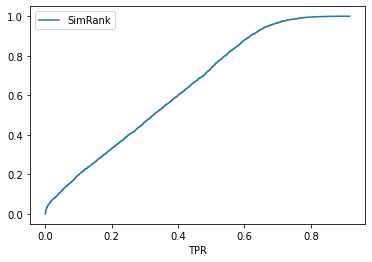

In [15]:
plt.plot(sm_evaluation.fallout(), sm_evaluation.recall(), label="SimRank")

plt.xlabel("FPR")
plt.xlabel("TPR")
plt.legend()
plt.show()

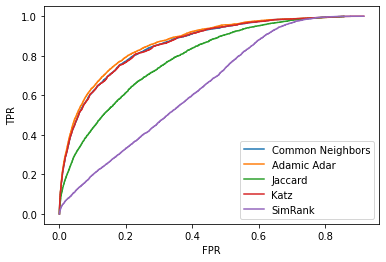

In [15]:
plt.plot(cn_evaluation.fallout(), cn_evaluation.recall(), label="Common Neighbors")
plt.plot(aa_evaluation.fallout(), aa_evaluation.recall(), label="Adamic Adar")
plt.plot(jc_evaluation.fallout(), jc_evaluation.recall(), label="Jaccard")
plt.plot(kz_evaluation.fallout(), kz_evaluation.recall(), label="Katz")
plt.plot(sm_evaluation.fallout(), sm_evaluation.recall(), label="SimRank")


plt.xlabel("FPR")
plt.ylabel("TPR")
plt.legend()
plt.show()

In [ ]:
plt.plot(cn_evaluation.fallout(), cn_evaluation.recall(), label="Common Neighbors")
plt.plot(aa_evaluation.fallout(), aa_evaluation.recall(), label="Adamic Adar")
plt.plot(jc_evaluation.fallout(), jc_evaluation.recall(), label="Jaccard")
plt.plot(kz_evaluation.fallout(), kz_evaluation.recall(), label="Katz")


plt.xlabel("FPR")
plt.xlabel("TPR")
plt.legend()
plt.show()

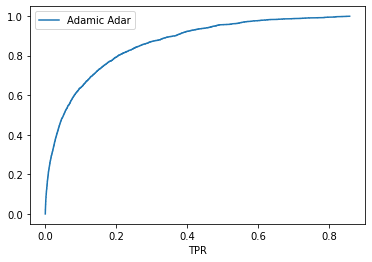

In [17]:
plt.plot(aa_evaluation.fallout(), aa_evaluation.recall(), label="Adamic Adar")


plt.xlabel("FPR")
plt.xlabel("TPR")
plt.legend()
plt.show()

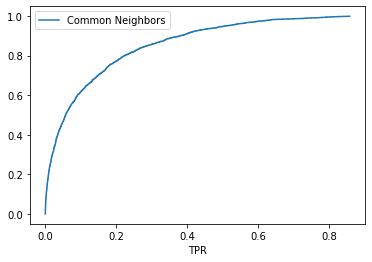

In [20]:
plt.plot(cn_evaluation.fallout(), cn_evaluation.recall(), label="Common Neighbors")
plt.xlabel("FPR")
plt.xlabel("TPR")
plt.legend()
plt.show()

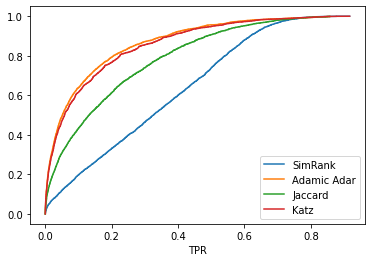

In [22]:
plt.plot(sm_evaluation.fallout(), sm_evaluation.recall(), label="SimRank")
plt.plot(aa_evaluation.fallout(), aa_evaluation.recall(), label="Adamic Adar")
plt.plot(jc_evaluation.fallout(), jc_evaluation.recall(), label="Jaccard")
plt.plot(kz_evaluation.fallout(), kz_evaluation.recall(), label="Katz")


plt.xlabel("FPR")
plt.xlabel("TPR")
plt.legend()
plt.show()

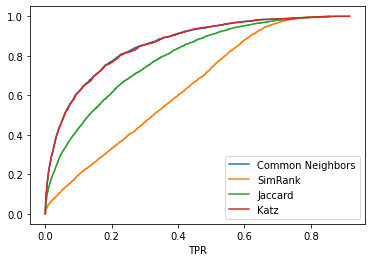

In [24]:
plt.plot(cn_evaluation.fallout(), cn_evaluation.recall(), label="Common Neighbors")
plt.plot(sm_evaluation.fallout(), sm_evaluation.recall(), label="SimRank")
plt.plot(jc_evaluation.fallout(), jc_evaluation.recall(), label="Jaccard")
plt.plot(kz_evaluation.fallout(), kz_evaluation.recall(), label="Katz")


plt.xlabel("FPR")
plt.xlabel("TPR")
plt.legend()
plt.show()

In [25]:
from sklearn.metrics import auc

print("Area Under Roc Curve (AUROC)")
print(f"Common Neigh.: \t {auc(cn_evaluation.fallout(), cn_evaluation.recall())}")
print(f"Adamic Adar: \t {auc(aa_evaluation.fallout(), aa_evaluation.recall())}")
print(f"Jaccard: \t {auc(jc_evaluation.fallout(), jc_evaluation.recall())}")
print(f"SimRank: \t {auc(sm_evaluation.fallout(), sm_evaluation.recall())}")
print(f"Katz:\t \t {auc(kz_evaluation.fallout(), kz_evaluation.recall())}")

Area Under Roc Curve (AUROC)
Common Neigh.: 	 0.7273769410683378
Adamic Adar: 	 0.7356935594531719
Jaccard: 	 0.6618226217485136
SimRank: 	 0.5872230136854926
Katz:	 	 0.7867972799134805


In [28]:
preds = list(nx.preferential_attachment(training,universe))
pref_results=[]
for u, v, p in preds:
    #print('(%s, %s) -> %d' % (u, v, p))
    pref_results.append([u,v,p])
pref_results=sorted(pref_results,key=lambda x: x[2],reverse=True)
pref_results

[['python', 'javascript', 109161],
 ['python', 'java', 108459],
 ['javascript', 'java', 96099],
 ['python', 'c#', 90558],
 ['python', 'node.js', 86697],
 ['python', 'android', 80379],
 ['javascript', 'c#', 80238],
 ['java', 'c#', 79722],
 ['python-3.x', 'python', 78975],
 ['node.js', 'javascript', 76817],
 ['node.js', 'java', 76323],
 ['python', 'c++', 75114],
 ['python', 'docker', 74412],
 ['reactjs', 'python', 71955],
 ['javascript', 'android', 71219],
 ['java', 'android', 70761],
 ['python-3.x', 'javascript', 69975],
 ['python-3.x', 'java', 69525],
 ['typescript', 'python', 67743],
 ['javascript', 'c++', 66554],
 ['java', 'c++', 66126],
 ['javascript', 'docker', 65932],
 ['java', 'docker', 65508],
 ['python', 'angular', 64584],
 ['python', 'flutter', 63882],
 ['reactjs', 'javascript', 63755],
 ['node.js', 'c#', 63726],
 ['python', 'php', 63531],
 ['reactjs', 'java', 63345],
 ['python', 'html', 60372],
 ['typescript', 'javascript', 60023],
 ['typescript', 'java', 59637],
 ['c#', 'and

In [29]:
def intersect(result_1, result_2, dim, name):
    print(f"{name}")
    int_1_2=[]
    count=0
    for item_1 in result_1[:300]:
        for item_2 in result_2[:300]:
            if item_1[0]==item_2[0]:
                print('intersezione:',item_1[0])
                int_1_2.append(item_1[0])
                count+=1
    print(count)
    return int_1_2

In [35]:
def intersection(lst1, lst2): 
    lst3 = [value for value in lst1 if value in lst2] 
    return lst3 

In [30]:
aa_cn = intersect(aa_results, cn_results, 300, "AA vs CN")
aa_jc = intersect(aa_results, jc_results, 300, "AA vs JC")
aa_kz = intersect(aa_results, kz_results, 300, "AA vs KZ")
aa_sm = intersect(aa_results, sm_results, 300, "AA vs SM")


AA vs CN
intersezione: server-side-rendering - python-3.x
intersezione: python-3.x - azure-active-directory
intersezione: r - python-3.x
intersezione: webpack - python-3.x
intersezione: python-3.x - google-bigquery
intersezione: python-3.x - kotlin
intersezione: python-3.x - iphone
intersezione: python-3.x - kotlin-coroutines
intersezione: storybook - python-3.x
intersezione: python-3.x - directory
intersezione: tailwind-css - python-3.x
intersezione: python-3.x - gdb
intersezione: python-3.x - f#
intersezione: python-3.x - automation
intersezione: python-3.x - github-actions
intersezione: tomcat - python-3.x
intersezione: python-3.x - dplyr
intersezione: ssl-certificate - python-3.x
intersezione: python-3.x - cordova
intersezione: sdk - python-3.x
intersezione: python-3.x - c++11
intersezione: python-3.x - node-modules
intersezione: tidyverse - python-3.x
intersezione: python-3.x - azure-devops
intersezione: vuejs2 - python-3.x
intersezione: python-3.x - jquery
intersezione: python-3.

intersezione: symfony - python-3.x
intersezione: python-3.x - cocoapods
intersezione: python-3.x - material-design
intersezione: python-3.x - package
intersezione: python-3.x - openid-connect
intersezione: python-3.x - localization
intersezione: vscode-debugger - python-3.x
intersezione: python-3.x - laravel
intersezione: python-3.x - expo
intersezione: python-3.x - amazon-cognito
intersezione: ruby-on-rails - python-3.x
intersezione: python-3.x - keycloak
intersezione: yarnpkg - python-3.x
intersezione: python-3.x - frontend
intersezione: python-3.x - casting
intersezione: python-3.x - blazor-server-side
intersezione: python-3.x - integer
intersezione: python-3.x - protocol-buffers
intersezione: typescript-typings - python-3.x
intersezione: python-3.x - constexpr
intersezione: python-3.x - blazor
intersezione: swagger - python-3.x
intersezione: python-3.x - angular-material
intersezione: python-3.x - junit
intersezione: python-3.x - babeljs
intersezione: react-hooks - python-3.x
inter

In [32]:
cn_jc = intersect(cn_results, jc_results, 300, "CN vs JC")
cn_kz = intersect(cn_results, kz_results, 300, "CN vs KZ")
cn_sm = intersect(cn_results, sm_results, 300, "CN vs SM")

CN vs JC
intersezione: server-side-rendering - python-3.x
intersezione: python-3.x - azure-active-directory
intersezione: r - python-3.x
intersezione: webpack - python-3.x
intersezione: python-3.x - google-bigquery
intersezione: python-3.x - kotlin
intersezione: python-3.x - iphone
intersezione: python-3.x - kotlin-coroutines
intersezione: storybook - python-3.x
intersezione: python-3.x - directory
intersezione: tailwind-css - python-3.x
intersezione: python-3.x - gdb
intersezione: python-3.x - f#
intersezione: python-3.x - automation
intersezione: python-3.x - github-actions
intersezione: tomcat - python-3.x
intersezione: python-3.x - dplyr
intersezione: ssl-certificate - python-3.x
intersezione: python-3.x - cordova
intersezione: sdk - python-3.x
intersezione: python-3.x - c++11
intersezione: python-3.x - node-modules
intersezione: tidyverse - python-3.x
intersezione: python-3.x - azure-devops
intersezione: vuejs2 - python-3.x
intersezione: python-3.x - jquery
intersezione: python-3.

intersezione: python-3.x - constexpr
intersezione: python-3.x - blazor
intersezione: python-3.x - angular-material
intersezione: python-3.x - junit
intersezione: python-3.x - babeljs
intersezione: python-3.x - google-cloud-firestore
intersezione: tuples - python-3.x
intersezione: python-3.x - caching
intersezione: react-hooks - python-3.x
intersezione: python-3.x - code-coverage
intersezione: python-3.x - initialization
intersezione: python-3.x - promise
intersezione: python-3.x - gitlab
intersezione: python-3.x - build
intersezione: python-3.x - authorization
intersezione: python-3.x - memory-leaks
intersezione: xml - python-3.x
intersezione: python-3.x - nuxt.js
intersezione: python-3.x - javascript
intersezione: python-3.x - androidx
intersezione: python-3.x - conda
intersezione: python-3.x - hibernate
intersezione: spring - python-3.x
intersezione: python-3.x - null
intersezione: python-3.x - electron
intersezione: python-3.x - android-studio
intersezione: python-3.x - asp.net-core

In [33]:
jc_kz = intersect(jc_results, kz_results, 300, "JC vs KZ")
jc_sm = intersect(jc_results, sm_results, 300, "JC vs SM")

JC vs KZ
intersezione: server-side-rendering - python-3.x
intersezione: python-3.x - azure-active-directory
intersezione: webpack - python-3.x
intersezione: python-3.x - google-bigquery
intersezione: python-3.x - iphone
intersezione: python-3.x - kotlin-coroutines
intersezione: storybook - python-3.x
intersezione: python-3.x - directory
intersezione: tailwind-css - python-3.x
intersezione: python-3.x - gdb
intersezione: python-3.x - automation
intersezione: tomcat - python-3.x
intersezione: ssl-certificate - python-3.x
intersezione: python-3.x - cordova
intersezione: sdk - python-3.x
intersezione: python-3.x - c++11
intersezione: python-3.x - node-modules
intersezione: vuejs2 - python-3.x
intersezione: python-3.x - jquery
intersezione: safari - python-3.x
intersezione: python-3.x - jwt-auth
intersezione: python-3.x - airflow
intersezione: python-3.x - data-visualization
intersezione: python-3.x - encoding
intersezione: python-3.x - devops
intersezione: python-3.x - google-analytics
int

In [34]:
kz_sm = intersect(kz_results, sm_results, 300, "KZ vs SM")

KZ vs SM
intersezione: python-3.x - android-jetpack
intersezione: python-3.x - java-14
intersezione: python-3.x - mvvm
intersezione: vuejs2 - python-3.x
intersezione: python-3.x - android-room
intersezione: python-3.x - cors
intersezione: static - python-3.x
intersezione: python-3.x - gdb
intersezione: python-3.x - lazy-evaluation
intersezione: python-3.x - arm
intersezione: ruby-on-rails-6 - python-3.x
intersezione: spring-data-jpa - python-3.x
intersezione: python-3.x - hibernate
intersezione: uikit - python-3.x
intersezione: python-3.x - google-bigquery
intersezione: single-page-application - python-3.x
intersezione: selenium-chromedriver - python-3.x
intersezione: reactive-programming - python-3.x
intersezione: python-3.x - integration-testing
intersezione: python-3.x - monads
intersezione: python-3.x - google-chrome-extension
intersezione: python-3.x - mariadb
intersezione: python-3.x - command-line
intersezione: zsh - python-3.x
intersezione: python-3.x - copy
intersezione: pytho

In [38]:
# All intersection
int_m=intersection(cn_jc,kz_sm)
int_final=intersection(int_m,aa_sm)

In [39]:
len(int_final)

191

In [40]:
int_final

[Pair('python-3.x', 'azure-active-directory'),
 Pair('webpack', 'python-3.x'),
 Pair('python-3.x', 'google-bigquery'),
 Pair('python-3.x', 'iphone'),
 Pair('python-3.x', 'kotlin-coroutines'),
 Pair('storybook', 'python-3.x'),
 Pair('python-3.x', 'gdb'),
 Pair('python-3.x', 'automation'),
 Pair('tomcat', 'python-3.x'),
 Pair('ssl-certificate', 'python-3.x'),
 Pair('sdk', 'python-3.x'),
 Pair('python-3.x', 'c++11'),
 Pair('python-3.x', 'node-modules'),
 Pair('vuejs2', 'python-3.x'),
 Pair('safari', 'python-3.x'),
 Pair('python-3.x', 'jwt-auth'),
 Pair('python-3.x', 'airflow'),
 Pair('python-3.x', 'data-visualization'),
 Pair('python-3.x', 'encoding'),
 Pair('python-3.x', 'devops'),
 Pair('python-3.x', 'google-analytics'),
 Pair('webview', 'python-3.x'),
 Pair('python-3.x', 'deployment'),
 Pair('static', 'python-3.x'),
 Pair('python-3.x', 'bootstrap-4'),
 Pair('python-3.x', 'flutter-dependencies'),
 Pair('spring-security', 'python-3.x'),
 Pair('python-3.x', 'command-line'),
 Pair('python-